In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import style
style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 

# Loading Dataset

In [3]:
data = pd.read_excel('Global Superstore.xls')

In [44]:
data.shape

(51290, 24)

In [45]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [47]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


# Dealing with Duplicate Values

In [4]:
data.duplicated().sum()

0

# Splitting Numerical and Categorical values

In [48]:
data_num = data.select_dtypes(include = [np.number])
data_cat = data.select_dtypes(include = ['object'])

In [49]:
data_num

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
0,32298,10024.0,2309.650,7,0.0,762.1845,933.570
1,26341,NaN,3709.395,9,0.1,-288.7650,923.630
2,25330,NaN,5175.171,9,0.1,919.9710,915.490
3,13524,NaN,2892.510,5,0.1,-96.5400,910.160
4,47221,NaN,2832.960,8,0.0,311.5200,903.040
...,...,...,...,...,...,...,...
51285,29002,NaN,65.100,5,0.0,4.5000,0.010
51286,35398,77095.0,0.444,1,0.8,-1.1100,0.010
51287,40470,93030.0,22.920,3,0.0,11.2308,0.010
51288,9596,NaN,13.440,2,0.0,2.4000,0.003


In [50]:
data_cat

,Order ID,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Order Priority
0,CA-2012-124891,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,Critical
1,IN-2013-77878,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",Critical
2,IN-2013-71249,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,Australia,APAC,Oceania,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",Medium
3,ES-2013-1579342,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,Germany,EU,Central,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",Medium
4,SG-2013-4320,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,Senegal,Africa,Africa,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",Critical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,IN-2014-62366,Same Day,KE-16420,Katrina Edelman,Corporate,Kure,Hiroshima,Japan,APAC,North Asia,OFF-FA-10000746,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",Medium
51286,US-2014-102288,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,Houston,Texas,United States,US,Central,OFF-AP-10002906,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,Medium
51287,US-2013-155768,Same Day,LB-16795,Laurel Beltran,Home Office,Oxnard,California,United States,US,West,OFF-EN-10001219,Office Supplies,Envelopes,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",High
51288,MX-2012-140767,Standard Class,RB-19795,Ross Baird,Home Office,Valinhos,São Paulo,Brazil,LATAM,South,OFF-BI-10000806,Office Supplies,Binders,"Acco Index Tab, Economy",Medium


In [51]:
data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         51290 non-null  int64  
 1   Postal Code    9994 non-null   float64
 2   Sales          51290 non-null  float64
 3   Quantity       51290 non-null  int64  
 4   Discount       51290 non-null  float64
 5   Profit         51290 non-null  float64
 6   Shipping Cost  51290 non-null  float64
dtypes: float64(5), int64(2)
memory usage: 2.7 MB


In [52]:
data_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Order ID        51290 non-null  object
 1   Ship Mode       51290 non-null  object
 2   Customer ID     51290 non-null  object
 3   Customer Name   51290 non-null  object
 4   Segment         51290 non-null  object
 5   City            51290 non-null  object
 6   State           51290 non-null  object
 7   Country         51290 non-null  object
 8   Market          51290 non-null  object
 9   Region          51290 non-null  object
 10  Product ID      51290 non-null  object
 11  Category        51290 non-null  object
 12  Sub-Category    51290 non-null  object
 13  Product Name    51290 non-null  object
 14  Order Priority  51290 non-null  object
dtypes: object(15)
memory usage: 5.9+ MB


# Numerical columns

In [53]:
data_num.columns

Index(['Row ID', 'Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping Cost'],
      dtype='object')

# Dealing with Null values

In [55]:
data_num.isnull().sum()

Row ID               0
Postal Code      41296
Sales                0
Quantity             0
Discount             0
Profit               0
Shipping Cost        0
dtype: int64

In [56]:
data_num_new = data_num[['Sales','Quantity','Discount','Profit','Shipping Cost']]

In [57]:
data_num_new.isnull().sum()

Sales            0
Quantity         0
Discount         0
Profit           0
Shipping Cost    0
dtype: int64

# Removing outliers  

<AxesSubplot:>

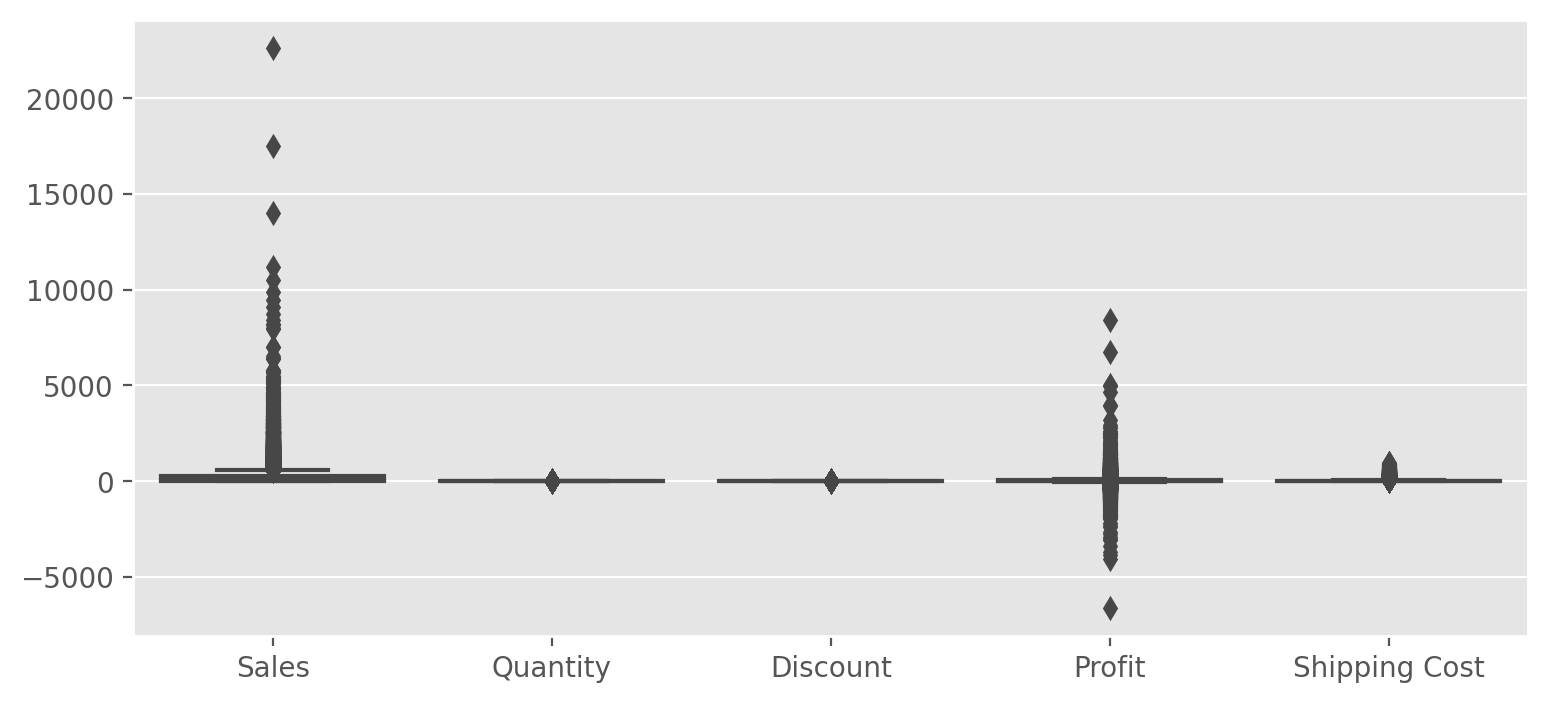

In [58]:
plt.figure(figsize = (9,4), dpi = 200)
sns.boxplot(data=data_num_new)

# Removing the datapoints which are more than 75% and less than 25%

In [59]:
data_num_new.Sales.describe()

count    51290.000000
mean       246.490581
std        487.565361
min          0.444000
25%         30.758625
50%         85.053000
75%        251.053200
max      22638.480000
Name: Sales, dtype: float64

# Plotting Boxplot before removal

<AxesSubplot:>

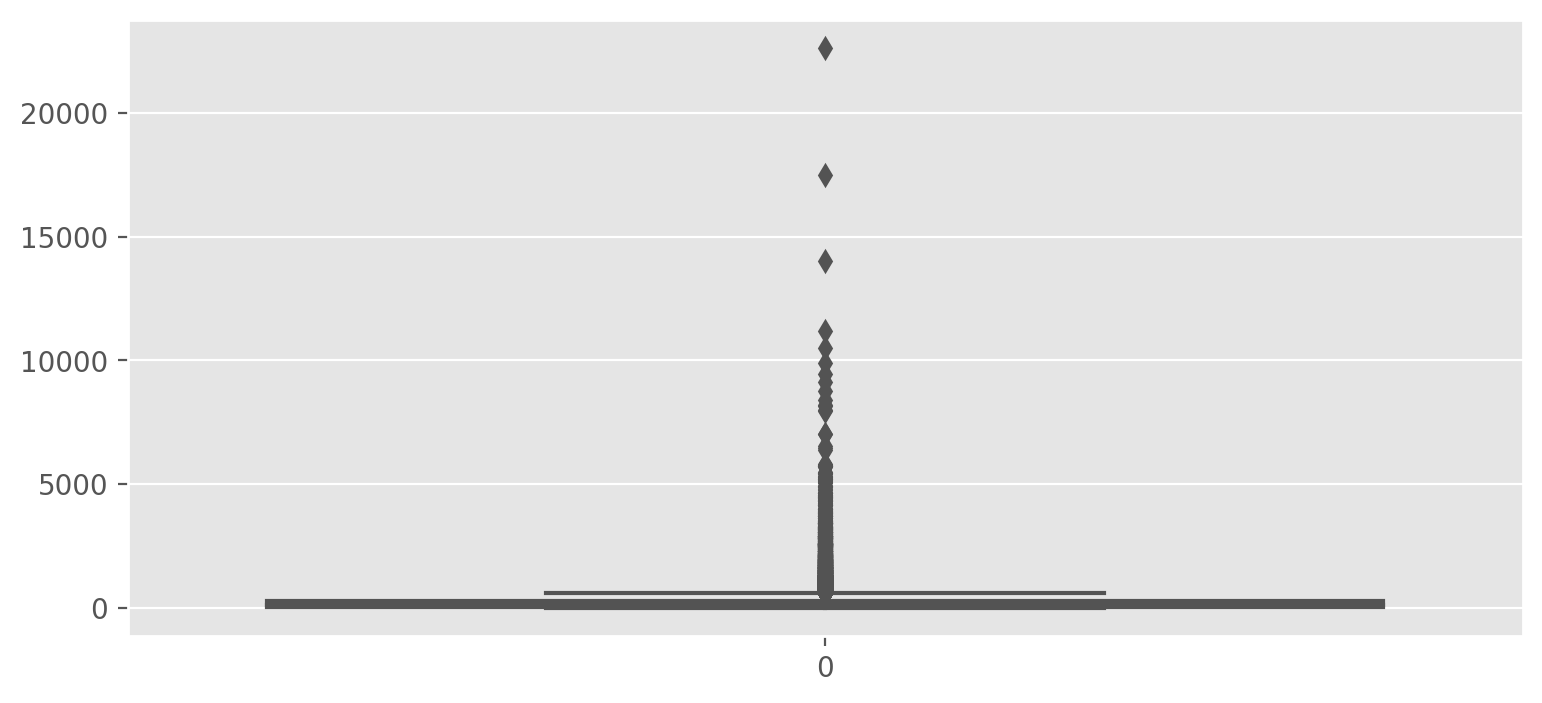

In [60]:
plt.figure(figsize = (9,4), dpi = 200)
sns.boxplot(data=data_num_new.Sales)

In [61]:
data_s = data_num_new[(data_num_new['Sales']>30.75)&(data_num_new['Sales']<251.05)]

# Plotting Boxplot after removal

<AxesSubplot:ylabel='Sales'>

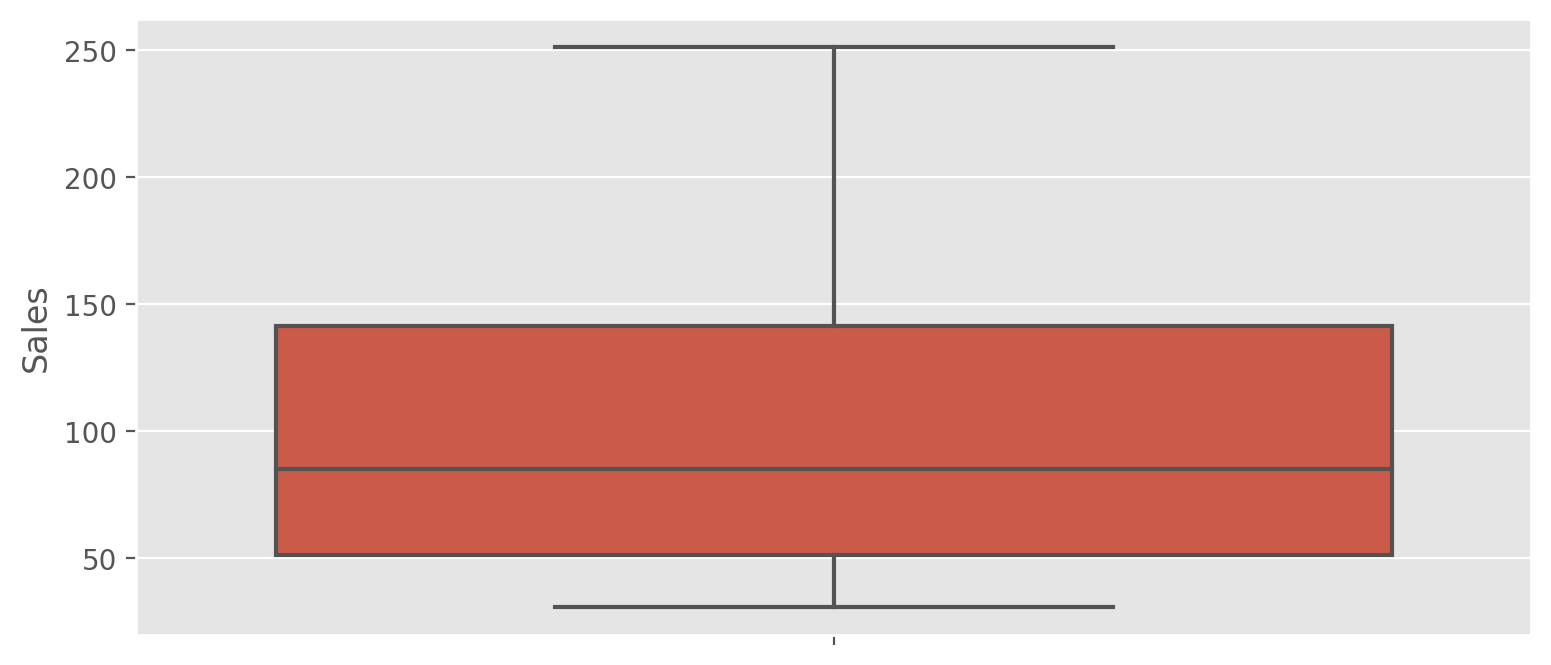

In [62]:
plt.figure(figsize = (9,4), dpi = 200)
sns.boxplot(y = data_s.Sales)

# Removing the datapoints which are more than 75% and less than 25%

In [63]:
data_s.Profit.describe()

count    25645.000000
mean         8.091763
std         47.397554
min      -1144.116000
25%          0.990000
50%         12.960000
75%         28.080000
max        125.280000
Name: Profit, dtype: float64

# Plotting Boxplot before removal

<AxesSubplot:ylabel='Profit'>

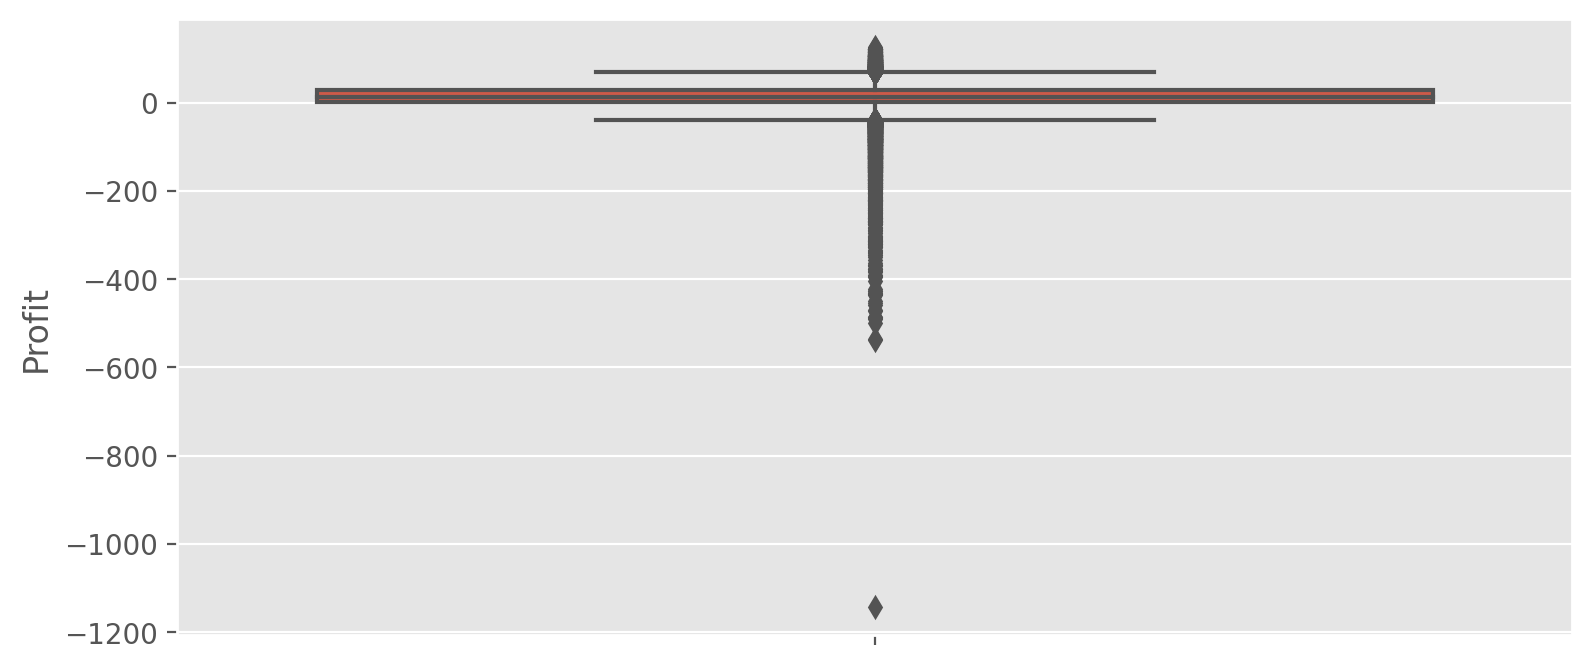

In [64]:
plt.figure(figsize = (9,4), dpi = 200)
sns.boxplot(y = data_s.Profit)

In [65]:
data_p = data_s[(data_s.Profit>0.99)&(data_s.Profit<28.08)]

# Plotting Boxplot after removal

<AxesSubplot:ylabel='Profit'>

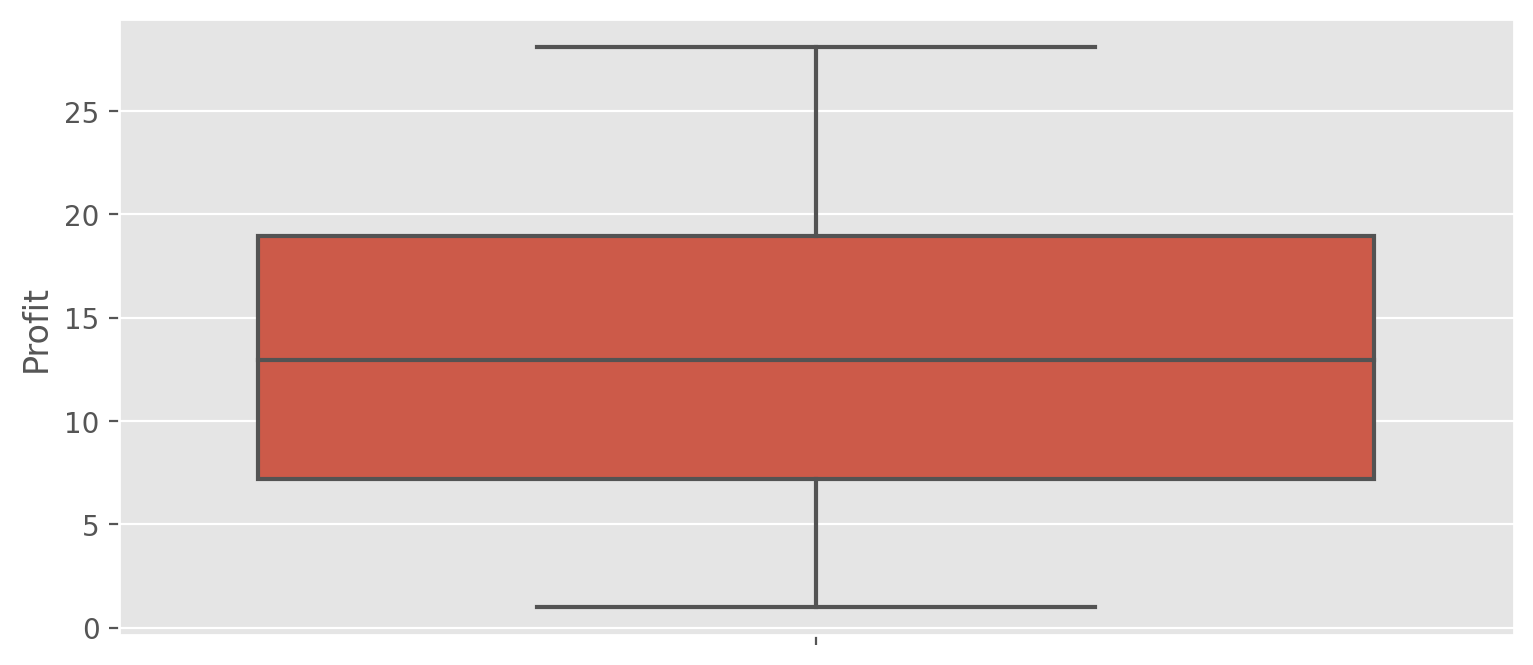

In [66]:
plt.figure(figsize = (9,4), dpi = 200)
sns.boxplot(y = data_p.Profit)

# Removing the datapoints which are more than 75% and less than 25%

In [67]:
data_p['Shipping Cost'].describe()

count    12816.000000
mean         8.708104
std          8.360567
min          0.002000
25%          3.590000
50%          6.140000
75%         10.790000
max         99.980000
Name: Shipping Cost, dtype: float64

# Plotting Boxplot before removal

<AxesSubplot:ylabel='Shipping Cost'>

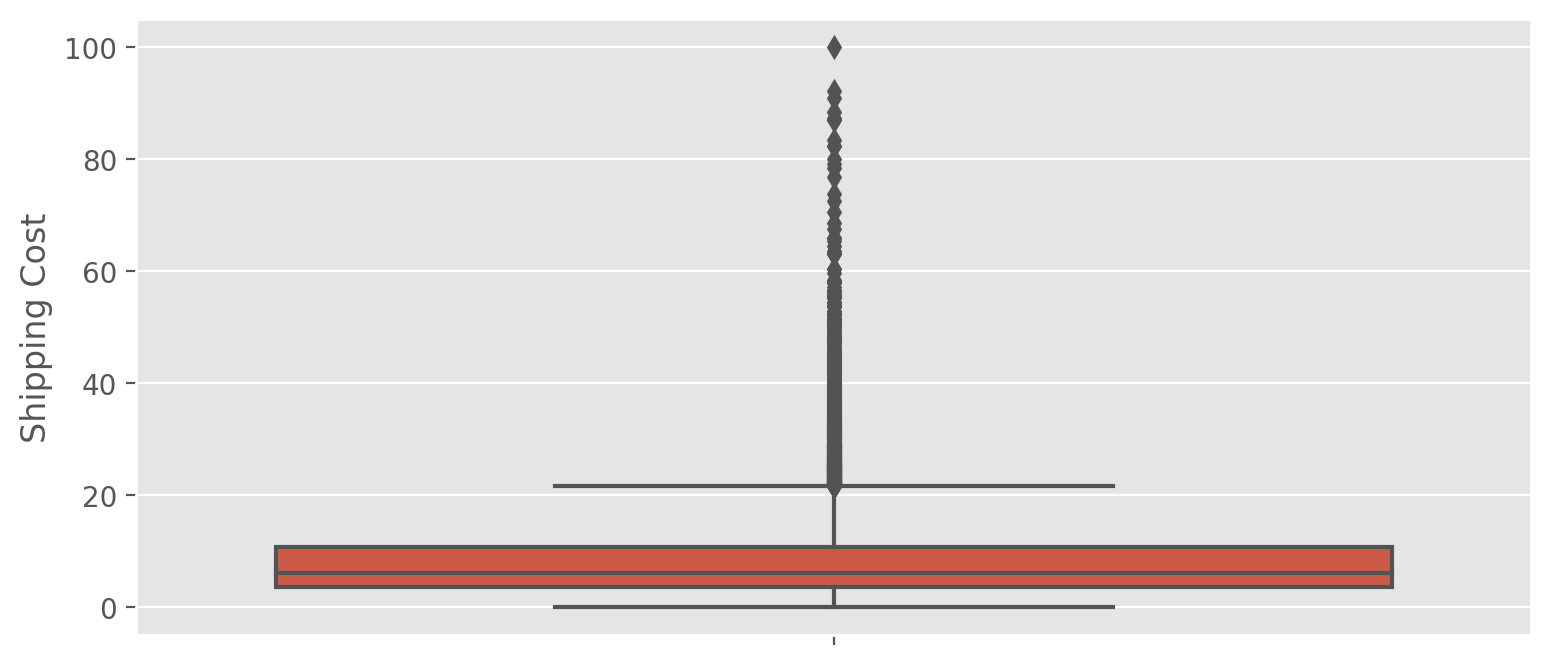

In [68]:
plt.figure(figsize = (9,4), dpi = 200)
sns.boxplot(y = data_p['Shipping Cost'])

In [69]:
data_sc = data_p[(data_p['Shipping Cost']>3.59)&(data_p['Shipping Cost']<10.79)]

# Plotting Boxplot after removal

<AxesSubplot:ylabel='Shipping Cost'>

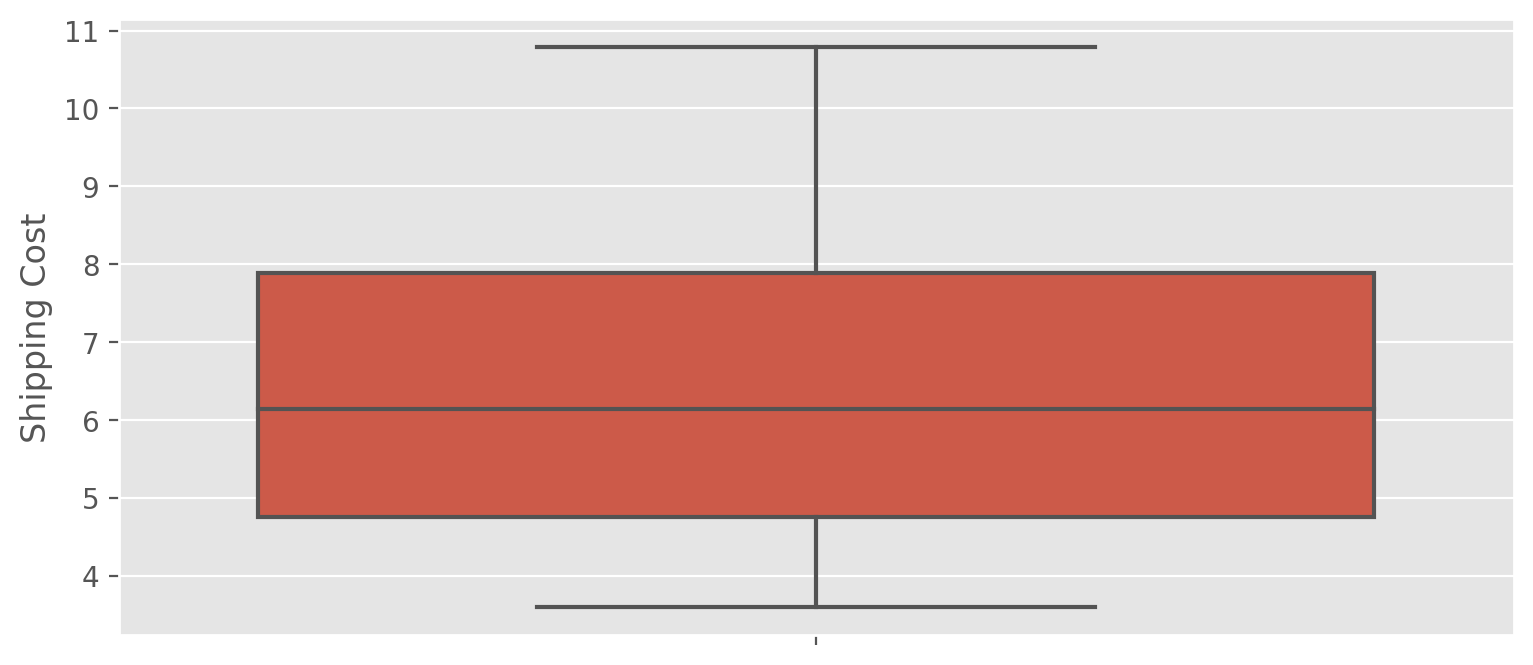

In [70]:
plt.figure(figsize = (9,4), dpi = 200)
sns.boxplot(y = data_sc['Shipping Cost'])

# Scaling

In [71]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
sc=scaler.fit(data_sc)
df_scaler= sc.fit_transform(data_sc)

<AxesSubplot:>

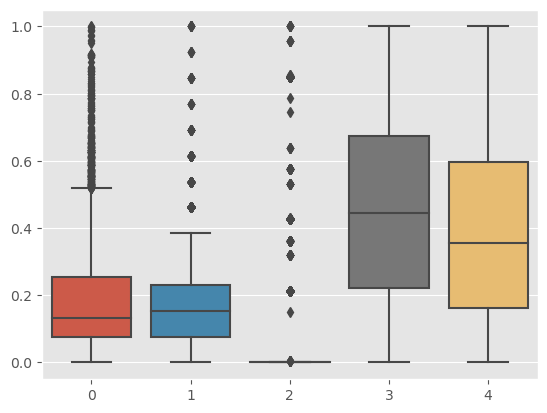

In [72]:
sns.boxplot(data=df_scaler)

# Categorical Columns

In [73]:
data_cat.columns

Index(['Order ID', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment',
       'City', 'State', 'Country', 'Market', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Order Priority'],
      dtype='object')

# Dealing with Null Values 

In [74]:
data_cat.isnull().sum()

Order ID          0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
City              0
State             0
Country           0
Market            0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Order Priority    0
dtype: int64

# Encoding

In [75]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data_cat=data_cat.apply(encoder.fit_transform)

In [76]:
data_cat

,Order ID,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Order Priority
0,1499,1,1286,632,0,2290,703,139,6,6,8246,2,0,2750,0
1,13063,2,808,413,1,3518,702,6,0,9,907,0,5,2525,0
2,12983,0,336,181,0,497,820,6,0,9,10157,2,13,2502,3
3,6813,0,873,424,2,375,145,47,4,3,10146,2,13,2414,3
4,21702,1,1290,632,0,857,270,110,1,0,10249,2,6,3158,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,14068,1,854,427,1,1726,410,65,0,8,4810,1,8,239,3
51286,24236,3,1587,793,0,1400,982,139,6,3,2622,1,1,1922,3
51287,24088,1,899,452,2,2408,192,139,6,12,4341,1,7,5,1
51288,17703,3,1249,652,2,3346,955,17,5,10,3490,1,3,87,3


In [77]:
data_sc.shape

(6406, 5)

In [78]:
data_cat.shape

(51290, 15)

In [79]:
data_cat=data_cat.loc[data_sc.index.values,:]

In [94]:
data_cat.shape

(6406, 15)

# Concatenate Numerical Values and Categorical Values

In [80]:
df_final=pd.concat([data_sc,data_cat],axis=1)

In [81]:
df_final

,Sales,Quantity,Discount,Profit,Shipping Cost,Order ID,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Order Priority
21750,56.760,3,0.0,24.9600,10.785,18747,0,1043,535,1,2710,837,17,5,10,6503,1,12,1303,1
21753,139.770,3,0.0,20.8800,10.780,5730,3,87,60,0,3342,833,44,4,3,2985,1,2,653,3
21756,213.136,7,0.2,23.9778,10.780,4406,3,263,173,1,772,742,139,6,6,2765,1,1,1445,3
21760,62.280,4,0.0,11.7600,10.780,21660,2,219,119,2,2597,348,116,1,0,4730,1,12,1315,1
21763,155.340,3,0.0,4.5900,10.770,6108,3,780,349,0,815,311,138,4,7,3069,1,2,709,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34964,58.020,3,0.0,16.8000,3.598,16574,3,875,447,0,477,955,17,5,10,3097,1,2,3070,3
34965,63.660,3,0.0,27.9600,3.597,16710,3,1152,566,0,2604,808,81,5,7,7496,1,15,143,3
34966,58.020,3,0.0,27.2400,3.596,18333,2,860,433,0,3435,320,17,5,10,3167,1,2,499,3
34967,35.100,3,0.0,3.1200,3.594,17982,3,242,150,0,432,846,17,5,10,1511,0,9,3412,3
